<center><b><big> CITS5508 LAB SHEET 4</big></b></center>

**Name: Thanh Duy Tang**<br>
**Student Number: 22803018**<br>
**Date created: 26th Apr 2020 <br>
**Last modified: 30th Apr 2020

## 1. Setup

Before going to loading data part, we need to make sure that MatplotLib figures inline and prepare a function to save the figures. Moreover, we should use Python 3.0 as well as Scikit-Learn >= 0.20

In [142]:
#Python >= 3.0 is required
import sys
assert sys.version_info >= (3,5)

#Scikit-Learn >= 0.20 
import sklearn
assert sklearn.__version__ >= '0.20'

#Get the pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Save the figures
import os
LAB2_ROOT_DIR = "."
CHAPTER_ID = "LAB SHEET 2"
IMAGES_PATH = os.path.join(LAB2_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
#Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 2. Loading data
First, we need to dowload the zip file from https://archive.ics.uci.edu/ml/datasets/wine+quality
and put the file into the same directory of this lab file.

In [143]:
#Load the Pandas libraries with alias "pd"
import os
import pandas as pd
#Read data from "winequality-white.csv and splitted by ";".
data_set = pd.read_csv("winequality-white.csv", delimiter =';')
data_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


There are 12 attributes in this dataset including numerical values. There is a column "quality" that describes the quality of the wine. 

In [144]:
#Summary how the dataset distrbitued in the dataset.
data_set.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


At first, the dataset doesn't have missing values. So I turned to prepare dataset step.

## 3. Preparing data

In [145]:
#Split training set into training set and test set following the ratio (85/15)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_set, test_size = 0.15, random_state=42)

In [146]:
train_set['quality'].value_counts()

6    1885
5    1234
7     735
8     146
4     143
3      15
9       5
Name: quality, dtype: int64

In [147]:
#Divided train_set and test_set into categorical and numerical set.
train_set_num = train_set.drop('quality', axis = 1)
train_set_target = train_set["quality"]
test_set_num = test_set.drop('quality', axis = 1)
test_set_target = test_set["quality"]

In [148]:
#Using StandardScaler to normalize the numeric data set.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set_num_tr = scaler.fit_transform(train_set_num)
test_set_num_tr = scaler.transform(test_set_num)
#Assign the each attribute into x_train, y_train, x_test, y_test.
x_train, y_train, x_test, y_test = train_set_num_tr, train_set_target, test_set_num_tr, test_set_target

The dataset is not normalized, so I used StandScaler to normalize the dataset.

## 4. Ada Boost Regressor

### Train Set

In [149]:
#Building AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

ada_reg_train = AdaBoostRegressor(SVR(kernel ='rbf'), n_estimators=6, learning_rate=0.1, random_state=42)
ada_reg_train.fit(x_train, y_train)
ada_y_pred_train = list(ada_reg_train.staged_predict(x_train))

#### n_estimators at 1

In [150]:
#Round the predicted values.
import numpy as np
ada_y_pred_train1 = ada_y_pred_train[0]
ada_y_pred_train1 = np.round(ada_y_pred_train1)

In [151]:
#Compute MSE of train set
from sklearn.metrics import mean_squared_error
MSE_train1 = mean_squared_error(y_train, ada_y_pred_train1)
MSE_train1

0.4799423492673553

#### n_estimators at 2

In [152]:
#Round the predicted values.
import numpy as np
ada_y_pred_train2 = ada_y_pred_train[1]
ada_y_pred_train2 = np.round(ada_y_pred_train2)

In [153]:
#Compute MSE of train set
from sklearn.metrics import mean_squared_error
MSE_train2 = mean_squared_error(y_train, ada_y_pred_train2)
MSE_train2

0.4799423492673553

#### n_estimators at 3

In [154]:
#Round the predicted values.
import numpy as np
ada_y_pred_train3 = ada_y_pred_train[2]
ada_y_pred_train3 = np.round(ada_y_pred_train3)

In [155]:
#Compute MSE of train set
from sklearn.metrics import mean_squared_error
MSE_train3 = mean_squared_error(y_train, ada_y_pred_train3)
MSE_train3

0.48018256065337495

#### n_estimators at 4

In [156]:
#Round the predicted values.
import numpy as np
ada_y_pred_train4 = ada_y_pred_train[3]
ada_y_pred_train4 = np.round(ada_y_pred_train4)

In [157]:
#Compute MSE of train set
from sklearn.metrics import mean_squared_error
MSE_train4 = mean_squared_error(y_train, ada_y_pred_train4)
MSE_train4

0.48018256065337495

#### n_estimators at 5

In [158]:
#Round the predicted values.
import numpy as np
ada_y_pred_train5 = ada_y_pred_train[4]
ada_y_pred_train5 = np.round(ada_y_pred_train5)

In [159]:
#Compute MSE of train set
from sklearn.metrics import mean_squared_error
MSE_train5 = mean_squared_error(y_train, ada_y_pred_train5)
MSE_train5

0.4676915685803507

#### Final estimator - n_estimators at 6

In [160]:
#Round the predicted values.
import numpy as np
ada_y_pred_train6 = ada_y_pred_train[5]
ada_y_pred_train6 = np.round(ada_y_pred_train6)

In [161]:
#Compute MSE of train set
from sklearn.metrics import mean_squared_error
MSE_train6 = mean_squared_error(y_train, ada_y_pred_train6)
MSE_train6

0.46240691808791734

### Test Set

#### n_estimators at 1

In [162]:
#Building AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

ada_reg_test = AdaBoostRegressor(SVR(kernel ='rbf'), n_estimators=6, learning_rate=0.1, random_state=42)
ada_reg_test.fit(x_train, y_train)
ada_y_pred_test = list(ada_reg_test.staged_predict(x_test))

In [163]:
#Round the predicted values.
import numpy as np
ada_y_pred_test1 = ada_y_pred_test[0]
ada_y_pred_test1 = np.round(ada_y_pred_test1)

In [164]:
#Compute MSE of test set
from sklearn.metrics import mean_squared_error
MSE_test1 = mean_squared_error(y_test, ada_y_pred_test1)
MSE_test1

0.6040816326530613

#### n_estimators at 2

In [165]:
#Round the predicted values.
import numpy as np
ada_y_pred_test2 = ada_y_pred_test[1]
ada_y_pred_test2 = np.round(ada_y_pred_test2)

In [166]:
#Compute MSE of test set
from sklearn.metrics import mean_squared_error
MSE_test2 = mean_squared_error(y_test, ada_y_pred_test2)
MSE_test2

0.6040816326530613

#### n_estimators at 3

In [167]:
#Round the predicted values.
import numpy as np
ada_y_pred_test3 = ada_y_pred_test[2]
ada_y_pred_test3 = np.round(ada_y_pred_test3)

In [168]:
#Compute MSE of test set
from sklearn.metrics import mean_squared_error
MSE_test3 = mean_squared_error(y_test, ada_y_pred_test3)
MSE_test3

0.5945578231292517

#### n_estimators at 4

In [169]:
#Round the predicted values.
import numpy as np
ada_y_pred_test4 = ada_y_pred_test[5]
ada_y_pred_test4 = np.round(ada_y_pred_test4)

In [170]:
#Compute MSE of test set
from sklearn.metrics import mean_squared_error
MSE_test4 = mean_squared_error(y_test, ada_y_pred_test4)
MSE_test4

0.5891156462585034

#### n_estimators at 5

In [171]:
#Round the predicted values.
import numpy as np
ada_y_pred_test5 = ada_y_pred_test[4]
ada_y_pred_test5 = np.round(ada_y_pred_test5)

In [172]:
#Compute MSE of test set
from sklearn.metrics import mean_squared_error
MSE_test5 = mean_squared_error(y_test, ada_y_pred_test5)
MSE_test5

0.5972789115646259

#### Final estimator - n_estimators at 6

In [173]:
#Round the predicted values.
import numpy as np
ada_y_pred_test6 = ada_y_pred_test[5]
ada_y_pred_test6 = np.round(ada_y_pred_test6)

In [174]:
#Compute MSE of test set
from sklearn.metrics import mean_squared_error
MSE_test6 = mean_squared_error(y_test, ada_y_pred_test6)
MSE_test6

0.5891156462585034

#### Plot all the results above from both test and train set

In [175]:
#Add MSEs of each estimator into list.
import numpy as np
test_mse_list = [MSE_test1,MSE_test2,MSE_test3,MSE_test4,MSE_test5,MSE_test6]
train_mse_list = [MSE_train1,MSE_train2,MSE_train3,MSE_train4,MSE_train5,MSE_train6]
n_estimators = [1,2,3,4,5,6]
test_mse_list = np.round(test_mse_list, decimals = 3)
train_mse_list = np.round(train_mse_list, decimals = 3)

In [176]:
#Change default plot size.
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 13
plt.rcParams["figure.figsize"] = fig_size

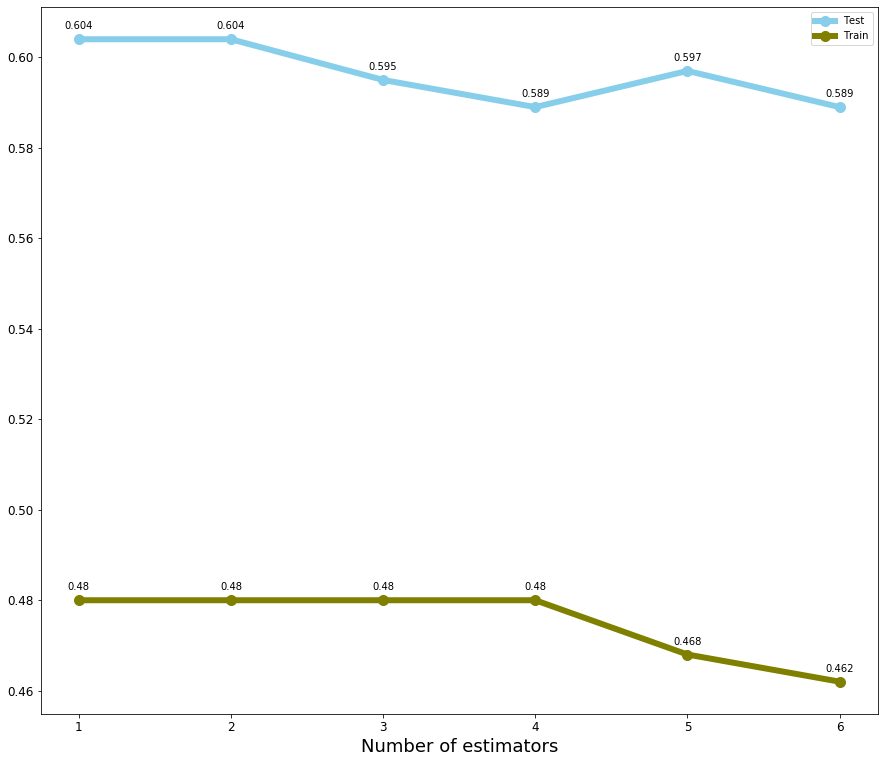

In [177]:
#Plot the MSE of each estimator
import matplotlib.pyplot as plt
for x,y in zip(n_estimators,test_mse_list):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
for x,y in zip(n_estimators, train_mse_list):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xticks(np.arange(-10,16,1))
plt.xticks(np.arange(-10,16,1))
plt.plot(n_estimators, test_mse_list, marker = '.', color='skyblue', linewidth=6, markersize = 20, label ='Test')
plt.plot(n_estimators, train_mse_list, marker = '.', color ='olive', linewidth=6, markersize = 20, label ='Train')
plt.xlabel('Number of estimators', fontsize=18)
plt.legend()
plt.show()

#### As we easily saw on the plot, the MSEs of both set tended to decrease when we increased the number of estimators. To be specific, the MSE dropped from 0.6041 to 0.5891 in the test set and dropped from 0.4799 to .4624 in the train set. In addition, MSEs from test set were higher than the MSEs from the train set. Otherwise, MSEs of train and test set remain unchanged at some points.

#### Plot the raw values of the last estimator

In [178]:
#Count the number of raw error of last estimator.
import numpy as np
import pandas as pd
diff = np.round(y_test - ada_y_pred_test6)
# Convert to num arrays
diff = np.array(diff)

unique, counts = np.unique(np.array(diff).flatten(), return_counts=True)
counts_diff = pd.DataFrame({"counts":counts}, index=unique) 
counts_diff


,counts
-3.0,4
-2.0,10
-1.0,131
0.0,421
1.0,150
2.0,19


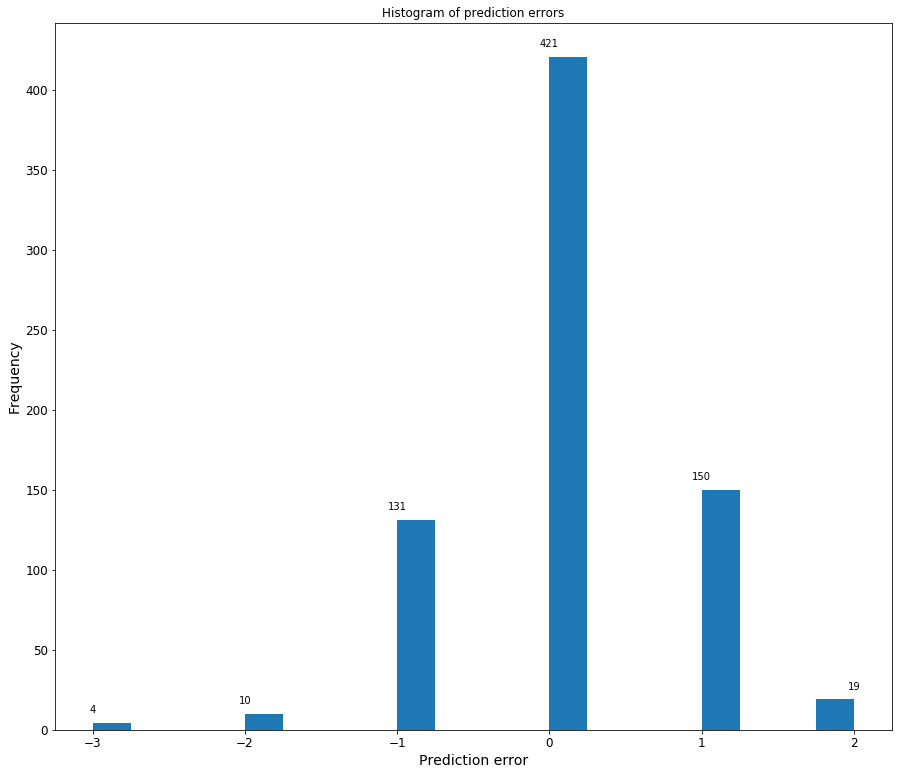

In [179]:
#Plot the raw errors of last estimator.
import matplotlib.pyplot as plt
plt.hist(diff, bins = 20, rwidth = 20)
for x,y in zip(unique, counts):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.show()

### The regressor correctly predicts the quality rating 421 times. Additionally, it also overestimates the quality rating by 1 150 times and by 2 19 times. Moreover, it underestimates the quality rating by 1 131 times and by 2 10 times and by 3 4 times.

In [180]:
#Compute RMSE of both train and test set of AdaBoost Regressor
import numpy as np
RMSE_ada_train = np.sqrt(MSE_train6)
RMSE_ada_test = np.sqrt(MSE_test6)
print(RMSE_ada_train)
print(RMSE_ada_test)

0.6800050868103248
0.7675386936555729


## 5. Gradient Boost Regressor

### Train Set

In [181]:
#Building GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr_reg_train = GradientBoostingRegressor(n_estimators=6, learning_rate=0.1, random_state=42)
gbr_reg_train.fit(x_train, y_train)
gbr_y_pred_train = list(gbr_reg_train.staged_predict(x_train))

#### n_estimators at 1

In [182]:
#Round the predicted values.
import numpy as np
gbr_y_pred_train1 = gbr_y_pred_train[0] 
gbr_y_pred_train1 = np.round(gbr_y_pred_train1)

In [183]:
#Compute MSE of train set
from sklearn.metrics import mean_squared_error
MSE_train1 = mean_squared_error(y_train, gbr_y_pred_train1)
MSE_train1

0.7938986307950997

#### n_estimators at 2

In [184]:
#Round the predicted values.
import numpy as np
gbr_y_pred_train2 = gbr_y_pred_train[1]
gbr_y_pred_train2 = np.round(gbr_y_pred_train2)

In [185]:
#Compute MSE of train set
from sklearn.metrics import mean_squared_error
MSE_train2 = mean_squared_error(y_train, gbr_y_pred_train2)
MSE_train2

0.7938986307950997

#### n_estimators at 3

In [186]:
#Round the predicted values.
import numpy as np
gbr_y_pred_train3 = gbr_y_pred_train[2]
gbr_y_pred_train3 = np.round(gbr_y_pred_train3)

In [187]:
#Compute MSE of train set
from sklearn.metrics import mean_squared_error
MSE_train3 = mean_squared_error(y_train, gbr_y_pred_train3)
MSE_train3

0.7938986307950997

#### n_estimators = 4

In [188]:
#Round the predicted values.
import numpy as np
gbr_y_pred_train4 = gbr_y_pred_train[3]
gbr_y_pred_train4 = np.round(gbr_y_pred_train4)

In [189]:
#Compute MSE of train set
from sklearn.metrics import mean_squared_error
MSE_train4 = mean_squared_error(y_train, gbr_y_pred_train4)
MSE_train4

0.7938986307950997

#### n_estimators = 5

In [190]:
#Round the predicted values.
import numpy as np
gbr_y_pred_train5 = gbr_y_pred_train[4]
gbr_y_pred_train5 = np.round(gbr_y_pred_train5)

In [191]:
#Compute MSE of train set
from sklearn.metrics import mean_squared_error
MSE_train5 = mean_squared_error(y_train, gbr_y_pred_train5)
MSE_train5

0.759548402594283

#### Final estimator - n_estimators at 6

In [192]:
#Round the predicted values.
import numpy as np
gbr_y_pred_train6 = gbr_y_pred_train[5]
gbr_y_pred_train6 = np.round(gbr_y_pred_train6)

In [193]:
#Compute MSE of train set
from sklearn.metrics import mean_squared_error
MSE_train6 = mean_squared_error(y_train, gbr_y_pred_train6)
MSE_train6

0.7583473456641845

### Test set

In [194]:
#Building GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr_reg_test = GradientBoostingRegressor(n_estimators=6, learning_rate=0.1, random_state=42)
gbr_reg_test.fit(x_train, y_train)
gbr_y_pred_test = list(gbr_reg_test.staged_predict(x_test))

#### n_estimators at 1

In [195]:
#Round the predicted values.
import numpy as np
gbr_y_pred_test1 = gbr_y_pred_test[0]
gbr_y_pred_test1 = np.round(gbr_y_pred_test1)

In [196]:
#Compute MSE of test set
from sklearn.metrics import mean_squared_error
MSE_test1 = mean_squared_error(y_test, gbr_y_pred_test1)
MSE_test1

0.8285714285714286

#### n_estimators at 2

In [197]:
#Round the predicted values.
import numpy as np
gbr_y_pred_test2 = gbr_y_pred_test[1]
gbr_y_pred_test2 = np.round(gbr_y_pred_test2)

In [198]:
#Compute MSE of test set
from sklearn.metrics import mean_squared_error
MSE_test2 = mean_squared_error(y_test, gbr_y_pred_test2)
MSE_test2

0.8285714285714286

#### n_estimators at 3

In [199]:
#Round the predicted values.
import numpy as np
gbr_y_pred_test3 = gbr_y_pred_test[2]
gbr_y_pred_test3 = np.round(gbr_y_pred_test3)

In [200]:
#Compute MSE of test set
from sklearn.metrics import mean_squared_error
MSE_test3 = mean_squared_error(y_test, gbr_y_pred_test3)
MSE_test3

0.8285714285714286

#### n_estimators at 4

In [201]:
#Round the predicted values.
import numpy as np
gbr_y_pred_test4 = gbr_y_pred_test[3]
gbr_y_pred_test4 = np.round(gbr_y_pred_test4)

In [202]:
#Compute MSE of test set
from sklearn.metrics import mean_squared_error
MSE_test4 = mean_squared_error(y_test, gbr_y_pred_test4)
MSE_test4

0.8285714285714286

#### n_estimators  at 5

In [203]:
#Round the predicted values.
import numpy as np
gbr_y_pred_test5 = gbr_y_pred_test[4]
gbr_y_pred_test5 = np.round(gbr_y_pred_test5)

In [204]:
#Compute MSE of test set
from sklearn.metrics import mean_squared_error
MSE_test5 = mean_squared_error(y_test, gbr_y_pred_test5)
MSE_test5

0.8204081632653061

#### Final estimator - n_estimators = 6

In [205]:
#Round the predicted values.
import numpy as np
gbr_y_pred_test6 = gbr_y_pred_test[5]
gbr_y_pred_test6 = np.round(gbr_y_pred_test6)

In [206]:
#Compute MSE of test set
from sklearn.metrics import mean_squared_error
MSE_test6 = mean_squared_error(y_test, gbr_y_pred_test6)
MSE_test6

0.8122448979591836

#### Plot all the results above from both test and train set

In [207]:
#Add MSEs of each estimator into list.
import numpy as np
test_mse_list = [MSE_test1,MSE_test2,MSE_test3,MSE_test4,MSE_test5,MSE_test6]
train_mse_list = [MSE_train1,MSE_train2,MSE_train3,MSE_train4,MSE_train5,MSE_train6]
n_estimators = [1,2,3,4,5,6]
test_mse_list = np.round(test_mse_list, decimals = 3)
train_mse_list = np.round(train_mse_list, decimals = 3)

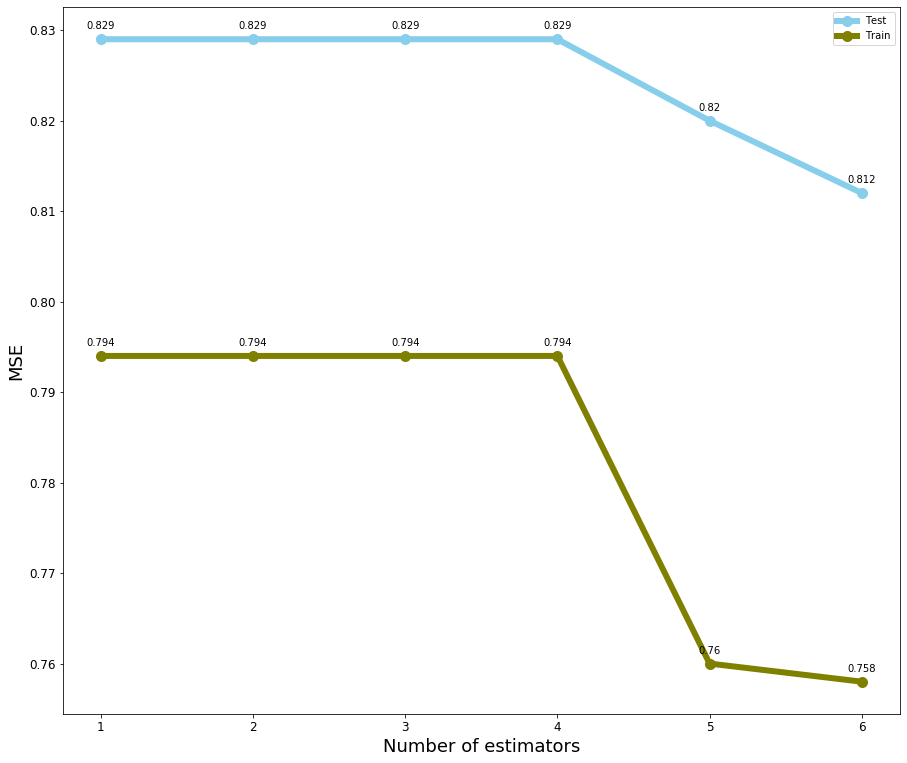

In [208]:
#Plot the MSE of each estimator
import matplotlib.pyplot as plt
for x,y in zip(n_estimators,test_mse_list):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
for x,y in zip(n_estimators, train_mse_list):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(n_estimators, test_mse_list, marker = '.', color='skyblue', linewidth=6, markersize = 20, label ='Test')
plt.plot(n_estimators, train_mse_list, marker = '.', color ='olive', linewidth=6, markersize = 20, label ='Train')
plt.xlabel('Number of estimators', fontsize=18)
plt.ylabel('MSE', fontsize=18)
plt.legend()
plt.show()

#### Both MSE of both train and test set tended to decrease from n_estimators at 1 to n_estimators at 6. All MSEs of train set were smaller than the MSEs of train set. Specifically, the MSE dropped from 0.8286 to 0.8122 in the test set and dropped from 0.7939 to 0.7583 in the train set. On the other hand, MSEs of both sets remained the same from n_estimators at 2 to n_estimators at 4 and then decreased afterward.

#### Plot raw values of the last estimator.

In [209]:
#Count the number of raw error of last estimator.
import numpy as np
import pandas as pd
diff = np.round(y_test - gbr_y_pred_test6)
# Convert to num arrays
diff = np.array(diff)

unique, counts = np.unique(np.array(diff).flatten(), return_counts=True)
counts_diff = pd.DataFrame({"counts":counts}, index=unique) 
counts_diff

,counts
-3.0,5
-2.0,17
-1.0,218
0.0,319
1.0,146
2.0,30


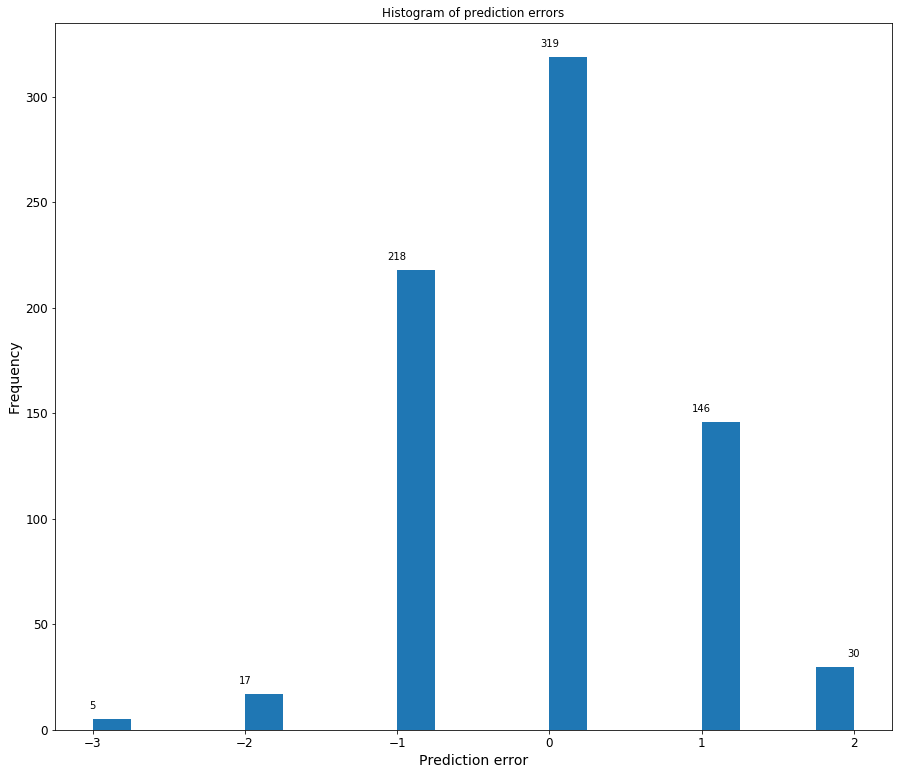

In [210]:
#Plot the raw errors of last estimator.
import matplotlib.pyplot as plt
plt.hist(diff, bins = 20, rwidth = 20)
for x,y in zip(unique, counts):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.show()

### The regressor correctly predicts the quality rating 319 times. Additionally, it also overestimates the quality rating by 1 146 times and by 2 30 times. Moreover, it underestimates the quality rating by 1 218 times and by 2 17 times and by 3 5 times.

In [211]:
#Compute RMSE of both train and test set of Gradient Boosting Regressor
import numpy as np
RMSE_gbr_train = np.sqrt(MSE_train6)
RMSE_gbr_test = np.sqrt(MSE_test6)
print(RMSE_gbr_train)
print(RMSE_gbr_test)

0.8708314105865638
0.9012463026050003


## 6. Conclusion

- MSEs of train set are always lower than MSEs of test set in this dataset.
- The trend of MSEs of both test and train set usually decreased when we increased the number of estimators of both regressors.
- The MSEs of both sets in AdaBoost Regressor with SVR with kernel = "rbf" were lower than the MSEs of both sets in Gradient Boosting Regressor.
- The MSEs of both regressors were relatively high which can cause higher RMSE => Because RMSE is interpreted as the standard deviation of the unexplained variance. Low RMSE indacated the better fit with the model. It is also the good measure of how accurately the model predicts the response.
- Compared to MSE of last estimator both regressors :
+ With Adaboost Regressor: MSE train was smaller than RMSE test but they not varied much => acceptable .
+ With Gradient Boosting Regressor: MSE train was smaller than MSE test which was still the same as Adaboost Regressor. Moreover, they not varied much => still acceptable.